Import de bibliothèque utiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Question 1** :

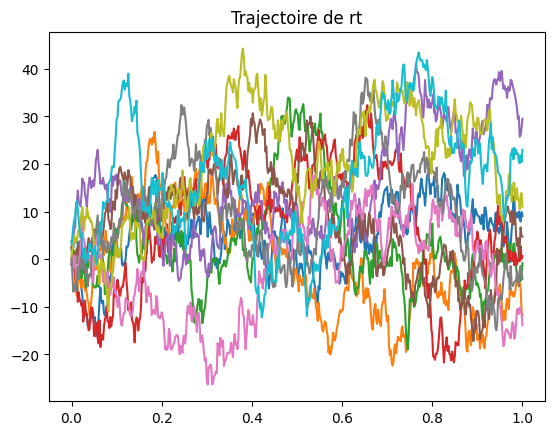

In [2]:
T=1 ; n=500 ; N=10
pas=T/n

# constantes
a=3; b=2 ; gamma=2

r=np.ones((n+1,N))

for j in range(N):
  for i in range(n+1):
    dW = np.random.normal(0,1)  # Pour chaque ligne, on définit un mouvement brownien
    #dr = a * (b - r[i]) * pas + gamma * dW
    r[i,j]= r[i-1,j] +  a*(b-r[i-1,j])*pas + gamma*dW # on stock la définition du modèle donnée sur la courbe de taux rt


date = np.linspace(0,T,n+1)
plt.plot(date,r)
plt.title("Trajectoire de rt")

plt.show()

On obtient ainsi la trajectoire de St, soit le modèle associé à la courbe de taux demandé. Cette courbe de taux est une des trajectoires que l'on objerve en multiple couleur.

Par exemple, le graphe ci-dessous, nous montre deux courbe de taux :

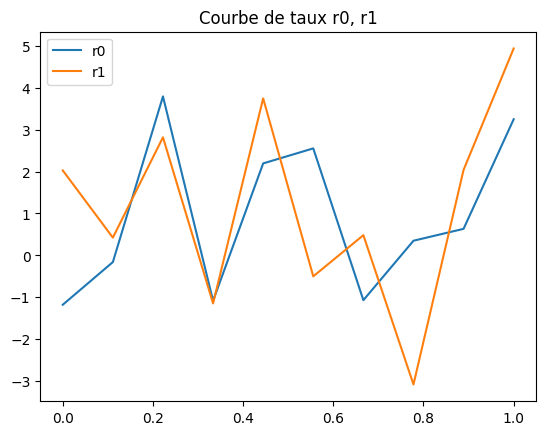

In [3]:
date = np.linspace(0,T,N)
Y1 = r[0][0:N]
Y2= r[1][0:N]
plt.plot(date,Y1, label="r0")
plt.plot(date,Y2, label="r1")
plt.title("Courbe de taux r0, r1")
plt.legend()
plt.show()


# **Question 2** :

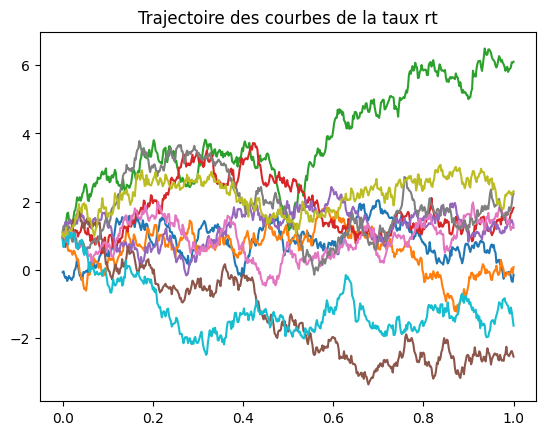

In [4]:

r0=1.5/100
r=np.ones((n+1,N))
r[:, 0] = r0 * np.ones(n + 1) ## on initialise notre rt à r0 tel que : r0=1.5%
#print(S[:,0])

a = 0.2 ; b = 2/100 ; gamma = 12/100

for j in range(N):
  for i in range(n+1):
    dW = np.random.normal(0,1)  # Pour chaque ligne, on définit un mouvement brownien
    #dr = a * (b - r[i]) * pas + gamma * dW
    r[i,j]= r[i-1,j] +  a*(b-r[i-1,j])*pas + gamma*dW # on stock nos valeur dans la matrice du calcul de taux


date = np.linspace(0,T,n+1)
plt.plot(date,r)
plt.title("Trajectoire des courbes de la taux rt")

plt.show()

# **Question 3**:
Nous pouvons ici utiliser la **méthode des trapèzes** qui approxime l'intégrale d'une fonction en divisant l'intervalle [0, T] en plusieurs sous-intervalles de largeur égale, puis en approchant la fonction par des segments de droite connectant les points de chaque sous-intervalle. La somme des aires des trapèzes formés donne une approximation de l'intégrale

In [5]:
def methode_trapeze(r, T, n):
    """
    Cette fonction permet d'approximer une intégrale à l'aide de la méthode des trapèzes
    Paramètres d'entrés:
        r est la fonction à intégrer
        T la borne sup de l'intervalle
        n le nombre de pas de chaque subdivition de l'intervalle
          --> ici le pas et régulier de taille T/n

    renvoie de la fonction :
        renvoie la valeur de l'approximation de l'intégrale de la fonction r sur l'intervalle [0;T]
    """
    dt = T / n
    u = np.linspace(0, T, n+1)
    integrand = r(u)

    integral = (dt/2) * (integrand[0] + 2 * np.sum(integrand[1:n]) + integrand[n])
    return integral

# définition de ce que l'on souhaite intégrer : ici la courbe de taux
def r(u):
  dW = np.random.normal(0,1)
  return  a*(b-u)*pas + gamma*dW  # Exemple avec notre courbe de taux donnée sur un vecteur quelconque


approximation = methode_trapeze(r, T, n)
print("Approximation de l'intégrale :", approximation)

Approximation de l'intégrale : -0.23728145255574828


# **Question 4** :

On utilise ici l'algorithme présenter dans l'exemple précédent pour exprimer la valeur du prix :

In [6]:
exposent = methode_trapeze(r,T,n)
Price = np.exp(-exposent)

print("B(0,T) : ", Price);

B(0,T) :  0.9129899723555083


# **Question 5** :
Pour déterminer si le marché obligataire (représenté par le prix de l'obligation zéro-coupon) et l'actif risqué S sont corrélés selon le modèle donné, nous devons examiner la corrélation entre les deux.

Dans le modèle donné, le mouvement brownien Wt est indépendant du mouvement brownien C, ce qui signifie que les variations du prix de l'obligation zéro-coupon et de l'actif S sont influencées par des facteurs stochastiques différents. Par conséquent, il n'y a pas de corrélation directe entre les deux actifs dans ce modèle.

Dans le contexte du modèle à volatilité locale en probabilité de risque neutre donné, il n'y a pas de corrélation directe entre le marché obligataire et l'actif S.

# **Question 6** :

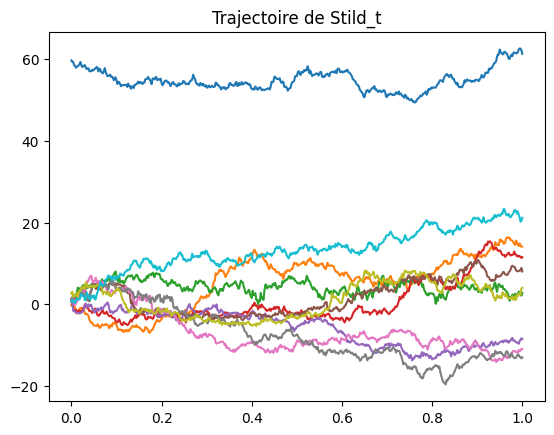

In [7]:
from math import *

Stild0=60
Stild=np.ones((n+1,N))
Stild[:, 0] = Stild0 * np.ones(n + 1)

def sigma(t,x):
  y = (15/100)*(1+ sqrt(t)+(x+1)/(1+x*x))
  return y

## On reprend notre code pour la calcul de la courbe de taux en le modifiant suivant les directives de l'exercice
for j in range(N):
  for i in range(n+1):
    dW = np.random.normal(0,1)  # Pour chaque ligne, on définit un mouvement brownien
    dC = np.random.normal(0,1) # On fait de même indépendament de dW
    dB = dW/2 + np.sqrt(3)*dC/2
    Stild[i,j]= Stild[i-1,j] +  sigma(pas, Stild[i-1,j])*np.sqrt(pas)*dB*60 # on obtient une définition du modèle donnée : dSt=sigma(St)Stdt
    # on multiplie par 60 pour voir quelque chose sur la graphe. Avec l'échelle logarithmique on ne voit rien

date = np.linspace(0,T,n+1)
plt.plot(date,Stild)
# plt.yscale('log')
# plt.xscale('log')
plt.title("Trajectoire de Stild_t")

plt.show()

Ici, les trajectoires obtenues à partir du schéma d'Euler ne sont que des approximations des solutions exactes de l'équation stochastique vérifiée par Stild.
Or, le schéma d'Euler est une méthode numérique d'approximation et peut introduire des erreurs d'approximation.
Pour obtenir des solutions exactes, d'autres méthodes numériques plus sophistiquées peuvent être utilisées, telle que la méthode de Runge-Kutta.



# **Question 7** :

Pour ce faire, on reprend le programme sur la courbe de taux et on le merge avec le programme précédent

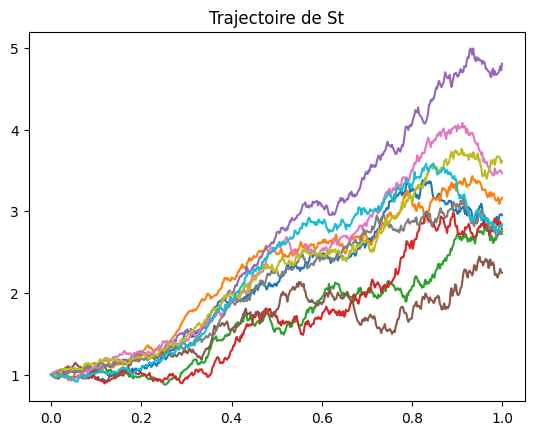

In [21]:
S0= 1 #60
r0=1.5/100
a = 0.2 ; b = 2/100 ; gamma = 12/100

r=r0*np.ones((n+1,N))
#r[:, 0] = r0 * np.ones(n + 1)
Stild=S0*np.ones((n+1,N))
#Stild[:, 0] = S0 * np.ones(n + 1)
SR = S0*np.ones((n+1,N))
#SR[:, 0] = S0 * np.ones(n + 1)
S = S0*np.ones((n+1,N))
#S[:, 0] = S0 * np.ones(n + 1)

for j in range(N):
   for i in range(1,n+1):
      dW = np.random.normal(0,1)  # Pour chaque ligne, on définit un mouvement brownien
      dC = np.random.normal(0,1) # On fait de même indépendament de dW
      dB = dW/2 + np.sqrt(3)*dC/2
      r[i,j]= r[i-1,j] +  a*(b-r[i-1,j])*pas + gamma*dW
      SR[i,j] = SR[i-1,j]+r[i,j]*SR[i-1,j]*pas ## on stock la valeur calculer pour le modèle dSt=rtStdt
      Stild[i,j] = Stild[i-1,j] + sigma(pas, Stild[i-1,j])*sqrt(pas)*dB # on obtient une définition du modèle donnée : dSt=rtSt
      S[i,j] = Stild[i,j]*SR[i,0]

#print(S[n, N-1])
date = np.linspace(0,T,n+1)
plt.plot(date,S)
# plt.yscale('log')
# plt.xscale('log')
plt.title("Trajectoire de St")

plt.show()

# **Question 8** :
Le principe permettant de calculer le prix d'une option de payoff terminal ξT à l'instant T dans un marché complet sans opportunité d'arbitrage repose sur la construction d'un portefeuille auto-financé qui réplique le payoff de l'option.

En utilisant le principe fondamental de la valorisation des actifs financiers, le prix de l'option à l'instant T est égal à la valeur du portefeuille auto-financé qui réplique le payoff de l'option. Ce portefeuille est construit à partir d'un mélange d'actifs risqués et sans risque.

Le principe numérique permettant d'approximer le prix d'une option consiste à simuler des trajectoires du sous-jacent (par exemple, un actif financier tel qu'une action) en utilisant des méthodes de Monte Carlo ou des schémas d'approximation numérique tels que le schéma d'Euler.

La procédure numérique d'approximation du prix de l'option comprend les étapes suivantes :

1. Simuler un grand nombre de trajectoires du sous-jacent jusqu'à l'instant T en utilisant des méthodes numériques appropriées.
2. Calculer le payoff de l'option pour chaque trajectoire à l'instant T.
3. Actualiser la valeur du payoff à l'instant actuel en utilisant le taux d'intérêt sans risque.
4. Calculer la moyenne des valeurs actualisées des payoffs pour obtenir une estimation du prix de l'option.

Cette approche est basée sur l'idée que la valeur moyenne des payoffs actualisés converge vers le prix de l'option lorsque le nombre de trajectoires simulées est suffisamment grand.

Pour conclue, l'approximation numérique du prix de l'option peut comporter une certaine erreur d'estimation, qui dépendra du nombre de trajectoires simulées et de la précision des méthodes numériques utilisées. Une augmentation du nombre de trajectoires simulées peut réduire l'erreur d'estimation.

# **Question 9** :

In [32]:

def payoff(K,x):
  return max(0,(K-x))

def meth_trap_option_asiatique(fction, T, n):
  return (1/T)*methode_trapeze(fction,T,n)

def option_asiatique(ST, T, n, fction):
  y = meth_trap_option_asiatique(fction, T, n)
  res = ST-y
  return y

def fct_S(u):
  dW = np.random.normal(0,1)
  dC = np.random.normal(0,1) # On fait de même indépendament de dW
  dB = dW/2 + np.sqrt(3)*dC/2
  y1= a*(b-u)*pas + gamma*dW # r(u) avec la valeur dW actuelle
  y2 = y1*u*pas # SR(u) avec la valeur r(u) suivant la valeur dW
  y3 = sigma(pas, u)*sqrt(pas)*dB #Stild(u) avec la valeur dB actuelle
  y4 = y3*y2
  return y4

ST = S[n, N-1] # On récupère ST dans la matrice S définit précédement
print("Valeur ST : ", ST)
print("Payoff : ", payoff(50,ST))
print("Approximation par la méthode des trapèze : ", meth_trap_option_asiatique(fct_S, T, n))
print("Valeur de l'option asiatique par l'approximatioin de la méthode des trapèzes : ", option_asiatique(ST, T, n, fct_S))


Valeur ST :  2.840519240680393
Payoff :  47.15948075931961
Approximation par la méthode des trapèze :  4.754026078075804e-07
Valeur de l'option asiatique par l'approximatioin de la méthode des trapèzes :  1.071017695432297e-06


Pour tester nos fonctions, nous avons pris qu'un cas particulier de ST : la dernière composante de la dernière colonne de la matrice S.
Nous allons reprendre les fonctions précédentes, et les faire fonctionner sur une boucle de toutes les valeurs des composantes de la dernière colonne de la matrice S, soit n+1 fois

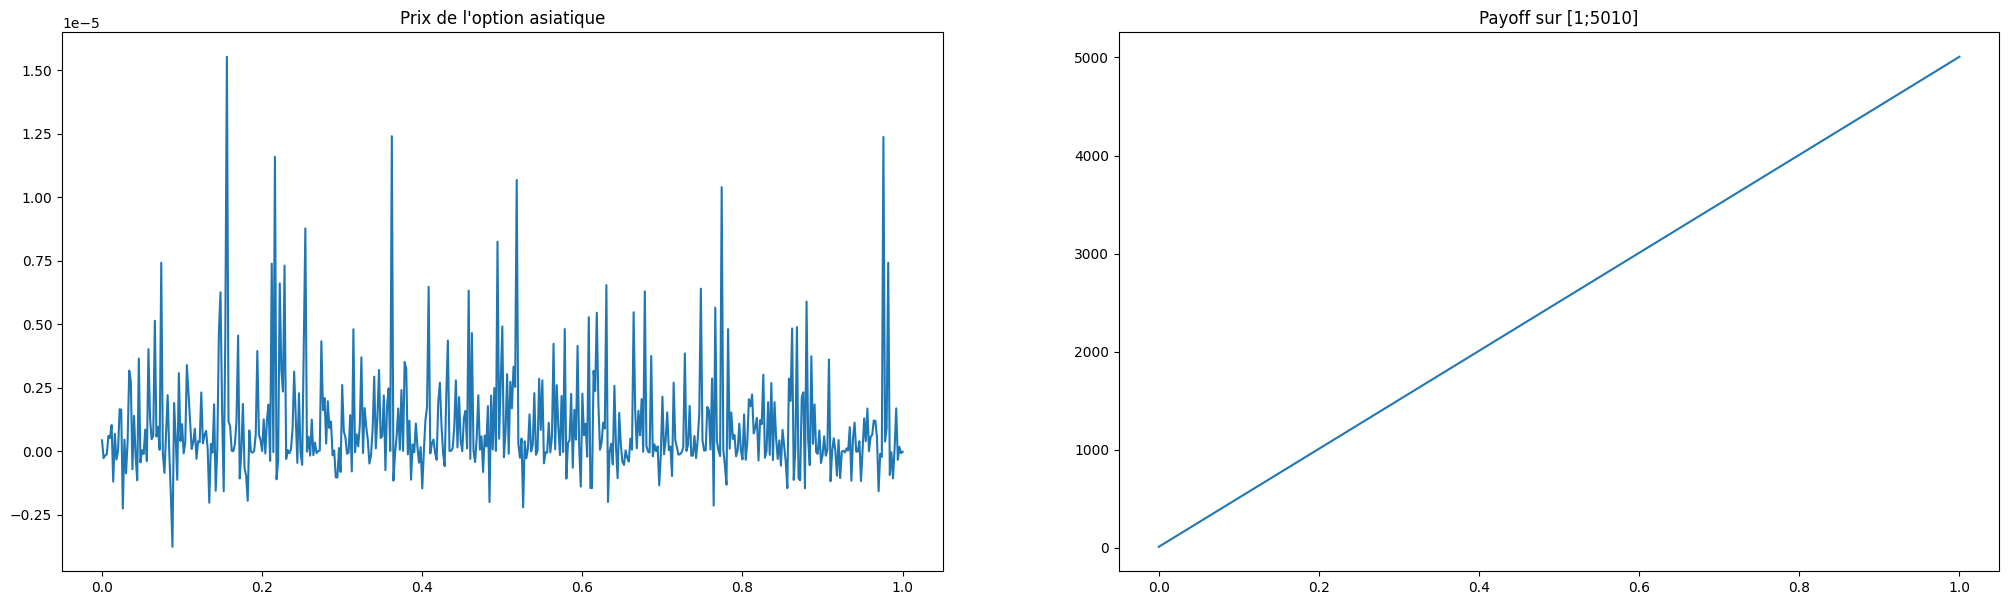

In [50]:
STbis=S[:, N-1]
res_option_asia = [] # vecteur où l'on va sotcker les résultat de l'option asiatique avec la méthode des trapèez
res_payoff = [] #vecteur où l'on va stocker les résultats du payoff suivant les différente vaeur de K et de ST
i=0

while(i<n+1):
    K=(i+1)*10
    ST_aux = STbis[i]
    y1=payoff(K, ST_aux)
    y2=option_asiatique(ST_aux, T, n, fct_S)
    res_option_asia.append(y2)
    res_payoff.append(y1)
    i=i+1


date = np.linspace(0,T,n+1)
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.plot(date,res_option_asia)
plt.title("Prix de l'option asiatique entre [0,1]")
plt.subplot(1,2,2)
plt.plot(date, res_payoff)
plt.title("Payoff sur [1;5010] entre [0,1]")

plt.show()